## Kompresija podataka

---

QR rastav s pivotiranjem stupaca možemo koristiti za __kompresiju (sažimanje) podataka__.

> Dijagonalni elementi matrice $R$ padaju po apsolutnoj vrijednosti pa možemo odrezati djelove matrica $Q$ i $R$ za koje smatramo da nisu značajni.

Dat ćemo primjer kompresije slike.

In [2]:
using Images, ImageMagick, FixedPointNumbers, Colors

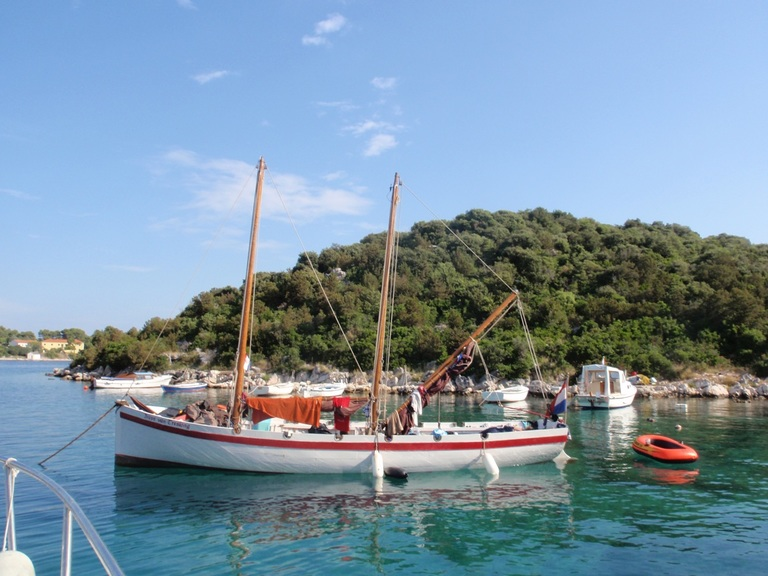

In [3]:
img=load("P8040001a.jpg")

In [4]:
# Opis podataka
show(img)

RGB Images.Image with:
  data: 768x576 Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: sRGB
    spatialorder:  x y

In [5]:
img[1,1]

In [6]:
show(img[1,1])

RGB{U8}(0.439,0.624,0.843)

In [7]:
# Razdvojimo sliku na R, G i B komponentu
imgsep=separate(img)
show(imgsep)

RGB Images.Image with:
  data: 576x768x3 Array{FixedPointNumbers.UFixed{UInt8,8},3}
  properties:
    colorspace: RGB
    colordim: 3
    spatialorder:  y x

In [8]:
R=data(imgsep[:,:,1])
G=data(imgsep[:,:,2])
B=data(imgsep[:,:,3])

576x768 Array{FixedPointNumbers.UFixed{UInt8,8},2}:
 0.843  0.843  0.847  0.847  0.847  …  0.949  0.953  0.953  0.965  0.969
 0.851  0.847  0.843  0.839  0.839     0.953  0.957  0.957  0.965  0.965
 0.843  0.847  0.851  0.851  0.851     0.957  0.961  0.957  0.961  0.961
 0.839  0.843  0.851  0.855  0.855     0.957  0.961  0.957  0.961  0.961
 0.851  0.847  0.843  0.839  0.839     0.957  0.957  0.957  0.957  0.953
 0.847  0.847  0.843  0.843  0.843  …  0.953  0.953  0.957  0.957  0.957
 0.839  0.843  0.851  0.855  0.855     0.953  0.957  0.957  0.957  0.957
 0.847  0.847  0.847  0.847  0.851     0.957  0.957  0.957  0.957  0.953
 0.855  0.855  0.855  0.855  0.851     0.949  0.957  0.953  0.953  0.957
 0.855  0.851  0.847  0.847  0.851     0.953  0.965  0.961  0.957  0.961
 0.855  0.851  0.847  0.847  0.851  …  0.953  0.961  0.957  0.957  0.957
 0.859  0.855  0.851  0.851  0.851     0.949  0.961  0.957  0.953  0.953
 0.855  0.855  0.855  0.851  0.851     0.953  0.961  0.961  0.961  0.957

In [9]:
# Izračunajmo QR rastav s pivotiranjem matrice svakog kanala
pivot=true
qR,rR,pR=qr(float(R),Val{true})
qG,rG,pG=qr(float(G),Val{true})
qB,rB,pB=qr(float(B),Val{true})

(
576x576 Array{Float64,2}:
 -0.0409506  -0.0472236   -0.0103994   …   0.0534731    -0.0110966 
 -0.0413333  -0.0470716   -0.00874257     -0.0953035     0.0214068 
 -0.0415247  -0.0467515   -0.00843348      0.102412     -0.100606  
 -0.041716   -0.0464313   -0.0088259      -0.0936279     0.151275  
 -0.0415247  -0.0467515   -0.00983651      0.110114     -0.0696709 
 -0.0415247  -0.0467515   -0.00913499  …  -0.1369        0.0186394 
 -0.0415247  -0.0467515   -0.00913499     -0.040314      0.0700018 
 -0.041716   -0.0469197   -0.0084888       0.0663284     0.0479999 
 -0.0415247  -0.0472398   -0.00879789      0.0218506     0.0333241 
 -0.041716   -0.0469197   -0.0084888      -0.0464993    -0.195574  
 -0.0419074  -0.0461112   -0.00921832  …   0.0695156     0.185227  
 -0.0419074  -0.0465995   -0.00888122     -0.031368     -0.0644612 
 -0.041716   -0.0469197   -0.00919032     -0.0185475    -0.0395275 
  ⋮                                    ⋱                 ⋮         
 -0.0430555   0.0046

In [10]:
norm(qR*rR[:,invperm(pR)]-float(R))

1.8339141617731853e-13

In [12]:
using Winston

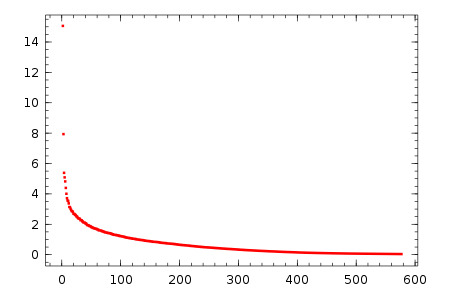

In [13]:
# Nacrtajmo dijagonalne elemente
plot(abs(diag(rR)),"r.")

In [14]:
# Izračunajmo komprimirane matrice za svaki kanal
k=50
Rcompressed=qR[:,1:k]*rR[1:k,invperm(pR)]
Gcompressed=qG[:,1:k]*rG[1:k,invperm(pG)]
Bcompressed=qB[:,1:k]*rB[1:k,invperm(pB)]

576x768 Array{Float64,2}:
 0.849219  0.849418  0.849612  0.848984  …  0.951222  0.951216  0.952343
 0.850834  0.850978  0.851206  0.850909     0.951578  0.951396  0.951979
 0.854566  0.855033  0.855641  0.854221     0.952285  0.952251  0.954134
 0.856746  0.856969  0.857193  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860863  0.861023  0.859647     0.951366  0.952204  0.9542  
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949303  0.950518
 0.856315  0.856868  0.857974  0.858545     0.954989  0.953994  0.954867
 0.853424  0.854004  0.854706  0.85662      0.959859  0.958582  0.957889
 0.855778  0.856114  0.856438  0.858547     0.950205  0.948848  0.947465
 0.857619  0.858369  0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862008  0.862344  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952246  0.951358  0.95138 
 ⋮                       

In [16]:
# Odrezimo elemente <0 i >1
Rcompressed=min(max(Rcompressed,0),1)
Gcompressed=min(max(Gcompressed,0),1)
Bcompressed=min(max(Bcompressed,0),1)

576x768 Array{Float64,2}:
 0.849219  0.849418  0.849612  0.848984  …  0.951222  0.951216  0.952343
 0.850834  0.850978  0.851206  0.850909     0.951578  0.951396  0.951979
 0.854566  0.855033  0.855641  0.854221     0.952285  0.952251  0.954134
 0.856746  0.856969  0.857193  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860863  0.861023  0.859647     0.951366  0.952204  0.9542  
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949303  0.950518
 0.856315  0.856868  0.857974  0.858545     0.954989  0.953994  0.954867
 0.853424  0.854004  0.854706  0.85662      0.959859  0.958582  0.957889
 0.855778  0.856114  0.856438  0.858547     0.950205  0.948848  0.947465
 0.857619  0.858369  0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862008  0.862344  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952246  0.951358  0.95138 
 ⋮                       

In [17]:
norm(float(R)-Rcompressed)/norm(float(R))

0.029813812819489565

In [18]:
# Definirajmo komprimiranu 3d matricu
imgcsep=similar(imgsep)
imgcsep[:,:,1]=Rcompressed
imgcsep[:,:,2]=Gcompressed
imgcsep[:,:,3]=Bcompressed

576x768 Array{Float64,2}:
 0.849219  0.849418  0.849612  0.848984  …  0.951222  0.951216  0.952343
 0.850834  0.850978  0.851206  0.850909     0.951578  0.951396  0.951979
 0.854566  0.855033  0.855641  0.854221     0.952285  0.952251  0.954134
 0.856746  0.856969  0.857193  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860863  0.861023  0.859647     0.951366  0.952204  0.9542  
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949303  0.950518
 0.856315  0.856868  0.857974  0.858545     0.954989  0.953994  0.954867
 0.853424  0.854004  0.854706  0.85662      0.959859  0.958582  0.957889
 0.855778  0.856114  0.856438  0.858547     0.950205  0.948848  0.947465
 0.857619  0.858369  0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862008  0.862344  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952246  0.951358  0.95138 
 ⋮                       

In [19]:
show(imgcsep)

RGB Images.Image with:
  data: 576x768x3 Array{FixedPointNumbers.UFixed{UInt8,8},3}
  properties:
    colorspace: RGB
    colordim: 3
    spatialorder:  y x

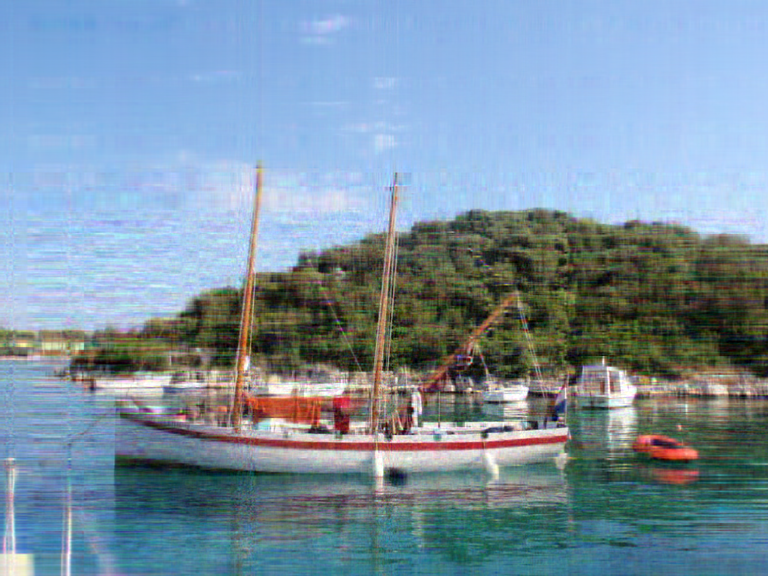

In [20]:
imgc = convert(Image{RGB}, imgcsep)

In [21]:
# Pogledajmo kako raste kvaliteta
using Interact

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"",50,50:10:150,true)

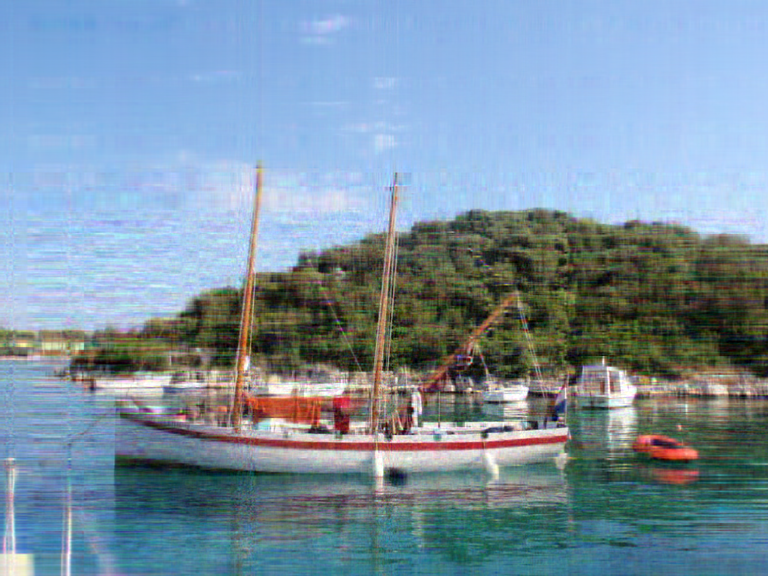

In [22]:
@manipulate for k in slider(50:10:150,value=50)
    Rcompressed=qR[:,1:k]*rR[1:k,invperm(pR)]
    Gcompressed=qG[:,1:k]*rG[1:k,invperm(pG)]
    Bcompressed=qB[:,1:k]*rB[1:k,invperm(pB)]
    Rcompressed=min(max(Rcompressed,0),1)
    Gcompressed=min(max(Gcompressed,0),1)
    Bcompressed=min(max(Bcompressed,0),1)
    imgcsep[:,:,1]=Rcompressed
    imgcsep[:,:,2]=Gcompressed
    imgcsep[:,:,3]=Bcompressed
    imgc = convert(Image{RGB}, imgcsep)
    imgc
end    

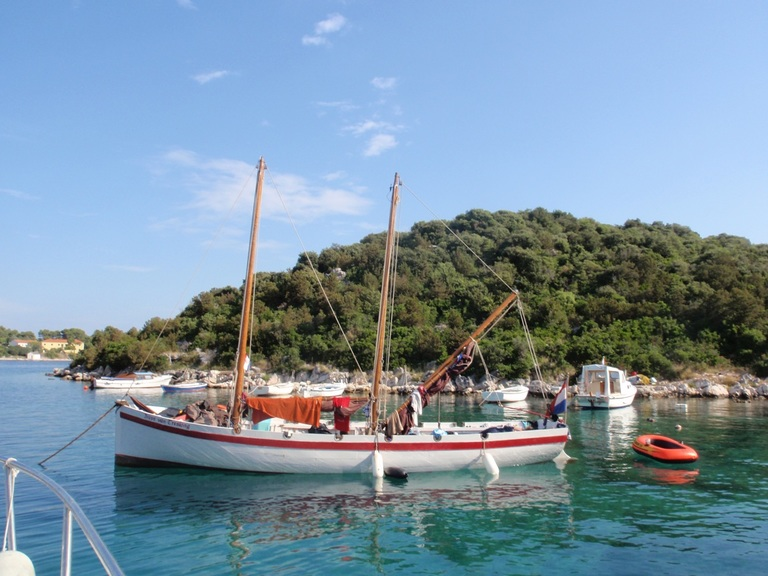

In [23]:
# Usporedimo s originalnom slikom
img